### Digit Classification Problem - Overview

In [1]:
# Notebook Preamble
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display, Latex

In [2]:
# Loading data for Digit Recognizer Problem
training_set = pd.read_csv("DigitRecognizer.csv", nrows=5000)
# Summary of Dataframe
print('Dimensions', training_set.shape) 
print(training_set.axes)

Dimensions (5000, 785)
[RangeIndex(start=0, stop=5000, step=1), Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)]


- The data file DigitRecognizer.csv contains gray-scale images of hand-drawn digits, from zero through nine.
- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
- The data set has 785 columns and 42K images. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image. 

In [3]:
N = 5000 
X = training_set.loc[:, 'pixel0':'pixel783']
Y = training_set.loc[:, 'label']

In [4]:
print('X - Dimensions:', X.shape, ', Type:', type(X))
print('Y- Dimensions:', Y.shape, ', Type:', type(Y))

X - Dimensions: (5000, 784) , Type: <class 'pandas.core.frame.DataFrame'>
Y- Dimensions: (5000,) , Type: <class 'pandas.core.series.Series'>


<Figure size 432x288 with 0 Axes>

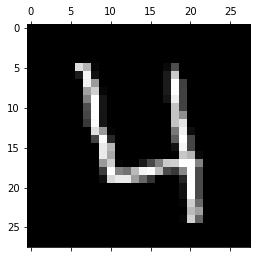

Lable for this image: 4


In [5]:
plt.gray()
plt.matshow(np.array(X.loc[3,:]).reshape((28,28)))
plt.show()
print('Lable for this image:', Y[3])

### Digit Classification Problem - Preprocessing and Dimensionality Reduction

In [6]:
from sklearn import preprocessing as sklpp
from sklearn import decomposition as skldecomp

In [7]:
# Standardizing mean using StandardScaler() object
mean_datascaler = sklpp.StandardScaler(with_mean=True, with_std=False)
X_centered = mean_datascaler.fit_transform(X)
mean_vector = mean_datascaler.mean_

<Figure size 432x288 with 0 Axes>

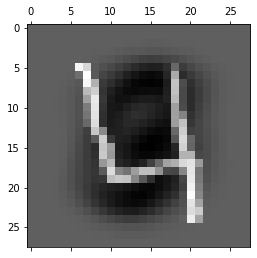

Lable for this image: 4


In [8]:
# Displaying the same image after data is centered
plt.gray()
plt.matshow(X_centered[3,:].reshape((28,28)))
plt.show()
print('Lable for this image:', Y[3])

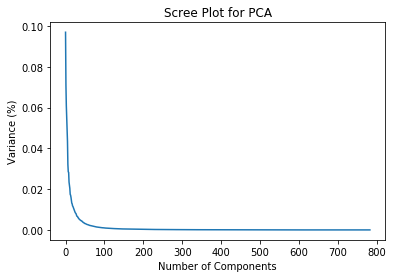

In [9]:
# creating an instance of the PCA() object
pca = skldecomp.PCA().fit(X_centered)
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Scree Plot for PCA')
plt.show()

From the Scree Plot, it can be seen that most of the variance is captured by less than first 100 principal components, i.e $k < 100$.

In [10]:
# creating an instance of the PCA() object that retains 90% information
data_pca = skldecomp.PCA(n_components=0.90, svd_solver='full') 
# using the fit_transform API to simultaneously compute PCA features and directions 
features_X = data_pca.fit_transform(X_centered) 
# printing the value of k, as returned by sklearn 
display(Latex(r'The value of the integer $k$ retaining 90% information is $k$ = {}.'.format(data_pca.n_components_)))

<IPython.core.display.Latex object>

In [11]:
# Reconstructing the image with k = 85
M = data_pca.components_[0:85,:]
X_tilde = X_centered@M.T
X_hat = mean_datascaler.inverse_transform(X_tilde@M)

<Figure size 432x288 with 0 Axes>

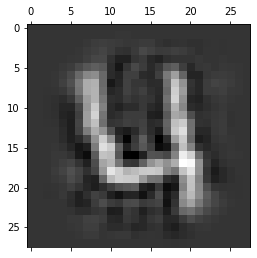

label for this image: 4


In [12]:
plt.gray() 
plt.matshow(X_hat[3,:].reshape((28,28))) 
plt.show()
print('label for this image:', Y[3])

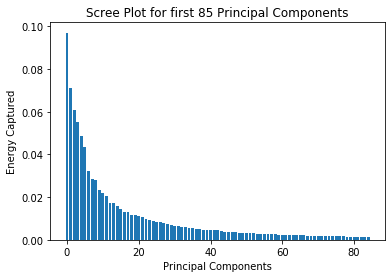

In [13]:
energy_captured = data_pca.explained_variance_ratio_
principal_components = [i for i in range(85)]
plt.bar(principal_components, energy_captured)
plt.title('Scree Plot for first 85 Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Energy Captured')
plt.show()

The chosen value for $k$ is $85$ since it captures 90% variability in the data.

In [14]:
# Modified data sets after Dimensionality Reduction
print('Independent Features:', X_tilde.shape, ', X_tilde Type:', type(X_tilde))
Y = np.array(Y)
print('Corresponding Labels:', Y.shape, ', Y Type:', type(Y))

Independent Features: (5000, 85) , X_tilde Type: <class 'numpy.ndarray'>
Corresponding Labels: (5000,) , Y Type: <class 'numpy.ndarray'>


### Digit Classification - Naive Baye's Approach

In [15]:
# Combining PCA features and corresponding Labels in a Single Pandas DataFrame.
df_features = pd.DataFrame(X_tilde, columns=['pca{}'.format(i+1) for i in range(85)])
df_labels = pd.DataFrame(Y, columns=['label'])
df = pd.concat([df_features, df_labels], axis=1)

In [16]:
# Summarizing Dataframe
print(df.shape)
print(df.axes)
print(df.dtypes)

(5000, 86)
[RangeIndex(start=0, stop=5000, step=1), Index(['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9',
       'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17',
       'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25',
       'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33',
       'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40', 'pca41',
       'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49',
       'pca50', 'pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57',
       'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65',
       'pca66', 'pca67', 'pca68', 'pca69', 'pca70', 'pca71', 'pca72', 'pca73',
       'pca74', 'pca75', 'pca76', 'pca77', 'pca78', 'pca79', 'pca80', 'pca81',
       'pca82', 'pca83', 'pca84', 'pca85', 'label'],
      dtype='object')]
pca1     float64
pca2     float64
pca3     float64
pca4     float64
pca5     float

In [17]:
# Random Partintioning of Dataframe into 70:30 ratio as Training and Test Set
from sklearn import model_selection as ms
training_data, test_data = ms.train_test_split(df, test_size=0.3)
print('Dimensions of Training Data: ', training_data.shape)
print('Dimensions of Test Data: ', test_data.shape)

Dimensions of Training Data:  (3500, 86)
Dimensions of Test Data:  (1500, 86)


Let n be the number of samples in Training data and m be the number of samples in Test data.

In [18]:
n = 3500
m = 1500

In [19]:
# Splitting the Training Dataframe w.r.t classes 0,1,2,...,9
df_label = [None]*10
for i in range(10):
    df_label[i] = training_data['label'] == i

In [20]:
# Summary of Training Dataset w.r.t classes 0,1,2,...,9
for i in range(10):
    print('Label:', i, '- Dimensions in Training Data:', training_data[df_label[i]].shape)

Label: 0 - Dimensions in Training Data: (345, 86)
Label: 1 - Dimensions in Training Data: (388, 86)
Label: 2 - Dimensions in Training Data: (381, 86)
Label: 3 - Dimensions in Training Data: (333, 86)
Label: 4 - Dimensions in Training Data: (339, 86)
Label: 5 - Dimensions in Training Data: (331, 86)
Label: 6 - Dimensions in Training Data: (360, 86)
Label: 7 - Dimensions in Training Data: (346, 86)
Label: 8 - Dimensions in Training Data: (334, 86)
Label: 9 - Dimensions in Training Data: (343, 86)


In [21]:
# Computing Prior Probabilities of each class 0,1,2,...,9
prior = [None]*10
for i in range(10):
    prior[i] = len(training_data[df_label[i]])/n
    print('Prior['+str(i)+'] =', round(prior[i], 3))

Prior[0] = 0.099
Prior[1] = 0.111
Prior[2] = 0.109
Prior[3] = 0.095
Prior[4] = 0.097
Prior[5] = 0.095
Prior[6] = 0.103
Prior[7] = 0.099
Prior[8] = 0.095
Prior[9] = 0.098


In [22]:
# Computing Mean Vectors for each class 0,1,2,...,9
mean_vector_i = [None]*10
for i in range(10):
    class_i_samples = training_data[df_label[i]]
    mean_vector_i[i] = np.array(class_i_samples.loc[:,'pca1':'pca85'].mean())

print('Mean Vector of class 0 Dimensions and type:', mean_vector_i[0].shape, type(mean_vector_i[0]))

Mean Vector of class 0 Dimensions and type: (85,) <class 'numpy.ndarray'>


In [23]:
# Computing Covariance Matrix for each class 0,1,2,...,9
covariance_matrix_i = [None]*10
for i in range(10):
    class_i_samples = training_data[df_label[i]]
    variance = class_i_samples.loc[:,'pca1':'pca85'].var()
    covariance_matrix_i[i] = np.diag(variance)
    
print('Covariance Matrix of class 0 Dimensions and type:', covariance_matrix_i[0].shape, type(covariance_matrix_i[0]))

Covariance Matrix of class 0 Dimensions and type: (85, 85) <class 'numpy.ndarray'>


In [24]:
# Computing multivariate normal distribution for each class 0,1,2,...,9
from scipy.stats import multivariate_normal as mvn
likelihood = [None]*10
for i in range(10):
    likelihood[i] = mvn(mean=mean_vector_i[i], cov=covariance_matrix_i[i])

<Figure size 432x288 with 0 Axes>

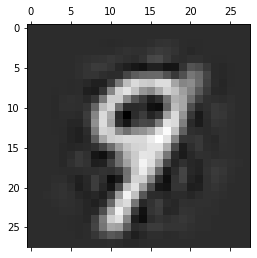

Label for this sample image: 9


In [25]:
# First Image in the test data
sample_image = test_data.iloc[0]
sample_image_label = int(sample_image.loc['label'])
sample_image_features = np.array(sample_image.loc['pca1':'pca85'])
sample_image = mean_datascaler.inverse_transform(sample_image_features@M)
plt.gray()
plt.matshow(sample_image.reshape((28,28)))
plt.show()
print('Label for this sample image:', sample_image_label)

In [26]:
# Based on the Image Features, computing the Probabilities that it belongs to a respective class
max_prob = 0
for i in range(10):
    prob = likelihood[i].pdf(sample_image_features)*prior[i]
    print('Probability[sample image is {}] = {}'.format(i, prob))
    if prob > max_prob:
        max_prob = prob
        arg_max = i  
display(Latex('\nBased on computed Probabilities, the digit is predicted to be $Y = {}$.'.format(arg_max)))

Probability[sample image is 0] = 1.6810132550946206e-234
Probability[sample image is 1] = 2.491831534397577e-241
Probability[sample image is 2] = 3.3521190705064916e-233
Probability[sample image is 3] = 7.717097601504892e-233
Probability[sample image is 4] = 2.279420807468797e-230
Probability[sample image is 5] = 5.6320711078729725e-232
Probability[sample image is 6] = 2.0432032226666675e-232
Probability[sample image is 7] = 3.3479273173432794e-230
Probability[sample image is 8] = 3.454002366623727e-232
Probability[sample image is 9] = 7.664734621860672e-228


<IPython.core.display.Latex object>

In [27]:
# Testing the approach on the full test data
test_features = np.array(test_data.loc[:, 'pca1':'pca85'])
test_labels = np.array(test_data.loc[:,'label'])
print('Dimensions of test data features: ', test_features.shape)
print('Dimensions of test data labels: ', test_labels.shape)

Dimensions of test data features:  (1500, 85)
Dimensions of test data labels:  (1500,)


In [28]:
def predict_digit(sample_features):
    global Prior
    global likelihood
    
    max_prob = 0
    for i in range(10):
        prob = likelihood[i].pdf(sample_features)*prior[i]
        if prob > max_prob:
            max_prob = prob
            arg_max = i 
    return arg_max

predict_digit(sample_image_features)

9

In [29]:
test_predictions = np.empty(m, int)
for i in range(m):
    test_predictions[i] = predict_digit(test_features[i])

In [30]:
# Comparing the First 15 classification results
print('True Labels: {}'.format(test_labels[:15]))
print('Predictions: {}'.format(test_predictions[:15]))

True Labels: [9 8 5 9 1 6 3 7 0 0 2 0 4 1 7]
Predictions: [9 8 5 9 1 6 3 7 0 0 2 0 4 1 9]


In [31]:
# Computing number of misclassifications
correct_classification = np.equal(test_labels, test_predictions)
error_idx = np.argwhere(correct_classification == False)  # array of test_data indexes where incorrect classifications are made 

print('Number of correct classifications:', sum(correct_classification))
print('Number of incorrect classifications:', len(error_idx))

Number of correct classifications: 1311
Number of incorrect classifications: 189


Actual Label: [7]
Output Label: [9]


<Figure size 432x288 with 0 Axes>

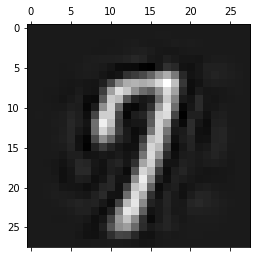


Actual Label: [6]
Output Label: [2]


<Figure size 432x288 with 0 Axes>

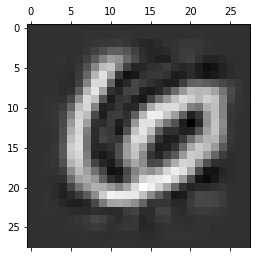


Actual Label: [6]
Output Label: [5]


<Figure size 432x288 with 0 Axes>

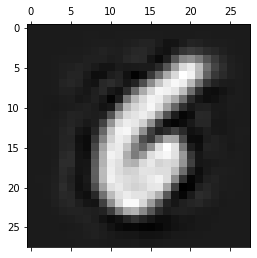

In [32]:
# Examples of incorrect images
for i in range(3):
    x = error_idx[i]
    print('Actual Label:', test_labels[x])
    print('Output Label:', test_predictions[x])
    image = mean_datascaler.inverse_transform(test_features[x]@M)
    plt.gray()
    plt.matshow(image.reshape((28,28)))
    plt.show()
    print('')

In [33]:
# Error rate of the classifier
print('The Error rate on this Naive Bayes classifier is {}%'.format(round(len(error_idx)*100/m, 2)))

The Error rate on this Naive Bayes classifier is 12.6%


The Digit classifier built using the Naive Bayes approach is **87.4% accurate** on this dataset.